Brad Blackwood

2022-02-17

# Zillow Data for Identifying Emerging Real Estate Markets
* Data contains property sale counts from 2008-present for 95 region/locations
* Identify markets that have increasing real estate activity.
* Predicting hot markets for real estate investment oppertunities.

### Notebook Layout
* Exploratory Data Analysis (EDA) & Data preparation
* Baseline model and comparatison metric determination.
* Model optimization
* Scaling data tests
* Model comparisons
* Prediction visualizations

# Exploratory Data Analysis (EDA) & Data preparation

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/Metro_sales_count_now_uc_sfrcondo_month.csv')
df.head(3)

RegionID  SizeRank                          RegionName RegionType  \
0    102001         0                       United States    Country   
1    394913         1                        New York, NY        Msa   
2    753899         2  Los Angeles-Long Beach-Anaheim, CA        Msa   

  StateName  2008-02-29  2008-03-31  2008-04-30  2008-05-31  2008-06-30  ...  \
0       NaN    185099.0    219079.0    241110.0    259949.0    275074.0  ...   
1        NY      8096.0      8797.0      9518.0      9797.0     10293.0  ...   
2        CA      3588.0      4350.0      5163.0      5657.0      5791.0  ...   

   2021-04-30  2021-05-31  2021-06-30  2021-07-31  2021-08-31  2021-09-30  \
0    463540.0    464142.0    539662.0    498427.0    489178.0    447145.0   
1     17864.0     17243.0     22149.0     21380.0     21096.0     18527.0   
2     11212.0     10267.0     11387.0     10453.0      9985.0      9646.0   

   2021-10-31  2021-11-30  2021-12-31  2022-01-31  
0    420659.0    402778.0    407568.0    267873.0  
1     18693.0     16629.0     18380.0     15923.0  
2      9367.0      8774.0      8623.0      6332.0  

[3 rows x 173 columns]

In [3]:
list(df.RegionName)

['United States',
 'New York, NY',
 'Los Angeles-Long Beach-Anaheim, CA',
 'Chicago, IL',
 'Dallas-Fort Worth, TX',
 'Philadelphia, PA',
 'Houston, TX',
 'Washington, DC',
 'Miami-Fort Lauderdale, FL',
 'Atlanta, GA',
 'Boston, MA',
 'San Francisco, CA',
 'Detroit, MI',
 'Riverside, CA',
 'Phoenix, AZ',
 'Seattle, WA',
 'Minneapolis-St Paul, MN',
 'San Diego, CA',
 'St. Louis, MO',
 'Tampa, FL',
 'Baltimore, MD',
 'Denver, CO',
 'Pittsburgh, PA',
 'Portland, OR',
 'Charlotte, NC',
 'Sacramento, CA',
 'San Antonio, TX',
 'Orlando, FL',
 'Cincinnati, OH',
 'Cleveland, OH',
 'Kansas City, MO',
 'Las Vegas, NV',
 'Columbus, OH',
 'Indianapolis, IN',
 'San Jose, CA',
 'Austin, TX',
 'Virginia Beach, VA',
 'Nashville, TN',
 'Providence, RI',
 'Milwaukee, WI',
 'Jacksonville, FL',
 'Memphis, TN',
 'Oklahoma City, OK',
 'Louisville-Jefferson County, KY',
 'Hartford, CT',
 'Richmond, VA',
 'New Orleans, LA',
 'Buffalo, NY',
 'Raleigh, NC',
 'Birmingham, AL',
 'Salt Lake City, UT',
 'Rochester, 

##### Time series manipulation

In [4]:
droped_cols = ['RegionID', 'SizeRank', 'RegionType', 'StateName']
df.drop(droped_cols, axis=1, inplace=True)
df.set_index('RegionName', inplace=True)
ts = df.T
ts.index = pd.to_datetime(ts.index)
ts = ts[:-1] # dropped most recent columns, It seemed incomplete/heavily skewed.

In [5]:
ts.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 167 entries, 2008-02-29 to 2021-12-31
Data columns (total 95 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   United States                       167 non-null    float64
 1   New York, NY                        159 non-null    float64
 2   Los Angeles-Long Beach-Anaheim, CA  167 non-null    float64
 3   Chicago, IL                         166 non-null    float64
 4   Dallas-Fort Worth, TX               167 non-null    float64
 5   Philadelphia, PA                    167 non-null    float64
 6   Houston, TX                         161 non-null    float64
 7   Washington, DC                      167 non-null    float64
 8   Miami-Fort Lauderdale, FL           167 non-null    float64
 9   Atlanta, GA                         167 non-null    float64
 10  Boston, MA                          167 non-null    float64
 11  San Francisco, CA         

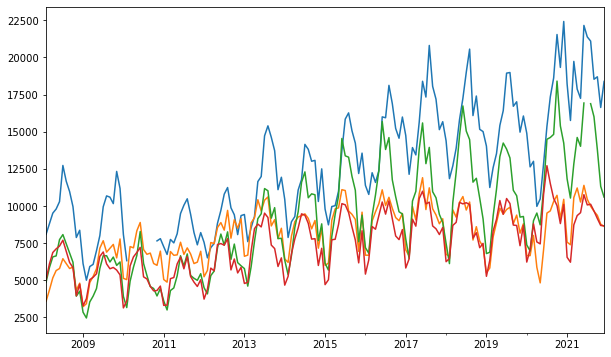

In [6]:
for x in ts.columns[1:5]:
    ts[x].plot(figsize=(10,6))

##### Data preperation - plan
* Missing Data
 * Drop cols with significant gaps
 * Interpolate data with small holes
* Non Stationary
 * Slight positive trend
 * Seasonal trends

In [7]:
max_missing_values = ts.shape[0] * .1 # 90% threshold for data
max_missing_values

16.7

In [8]:
significant_gaps = ts.isna().sum()[ts.isna().sum() > max_missing_values].index
significant_gaps

Index(['Birmingham, AL', 'Omaha, NE', 'Bakersfield, CA', 'McAllen, TX',
       'Little Rock, AR', 'Wichita, KS'],
      dtype='object', name='RegionName')

Viusalization of the incomplete data getting dropped before modeling

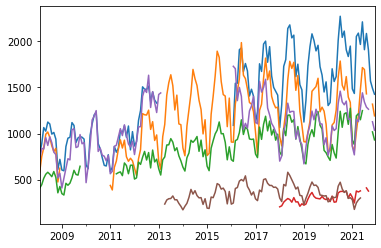

In [9]:
for x in significant_gaps:
    ts[x].plot()

In [10]:
ts.shape[1]

95

In [11]:
ts.drop(significant_gaps, axis=1, inplace=True)
ts.shape[1]

89

Visualizing the filling method for missing data that will be including in modeling.

* Future analysis should include different methods for handling incomplete data. Incomplete data (potentially) leads to heavily skewed results during modeling.

<AxesSubplot:>

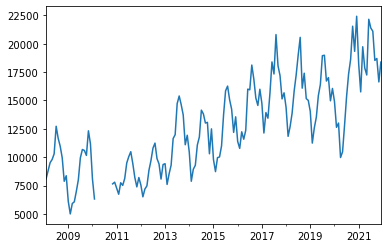

In [12]:
ts['New York, NY'].plot()

In [13]:
ts.interpolate(inplace=True)
ts.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 167 entries, 2008-02-29 to 2021-12-31
Data columns (total 89 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   United States                       167 non-null    float64
 1   New York, NY                        167 non-null    float64
 2   Los Angeles-Long Beach-Anaheim, CA  167 non-null    float64
 3   Chicago, IL                         167 non-null    float64
 4   Dallas-Fort Worth, TX               167 non-null    float64
 5   Philadelphia, PA                    167 non-null    float64
 6   Houston, TX                         167 non-null    float64
 7   Washington, DC                      167 non-null    float64
 8   Miami-Fort Lauderdale, FL           167 non-null    float64
 9   Atlanta, GA                         167 non-null    float64
 10  Boston, MA                          167 non-null    float64
 11  San Francisco, CA         

<AxesSubplot:>

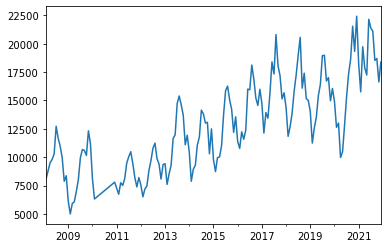

In [14]:
ts['New York, NY'].plot()

# Baseline model and comparatison metric determination.

* Use acf and pacf to determine min parameters for a baseline ARIMA model.
* Use adfuller test to confirm stationarity.
* Identify baseline comparison metrics (AIC and RMSE) 

In [15]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.api import SARIMAX
import statsmodels.api as sm

from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf

from statsmodels.tsa.stattools import adfuller

import warnings
warnings.filterwarnings('ignore')

In [16]:
def ts_comp(timeseries):
    no_null_ts = timeseries.dropna()
    
    fig, ax = plt.subplots(figsize=(16,3))
    plot_acf(no_null_ts, ax=ax);

    fig, ax = plt.subplots(figsize=(16,3))
    plot_pacf(no_null_ts, ax=ax);
    
    if adfuller(no_null_ts)[1] > 0.05:
        print('not stationary')
    else:
        print('stationary')
    
def print_arima_summary(timeseries, order=(1,1,1)):
    arima_model = ARIMA(timeseries, order=order)
    res_arima = arima_model.fit()
    print(res_arima.summary())
    return res_arima

not stationary


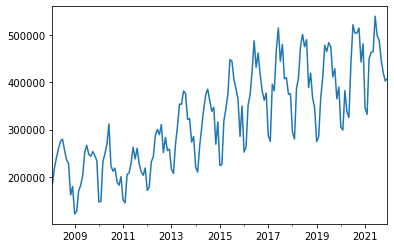

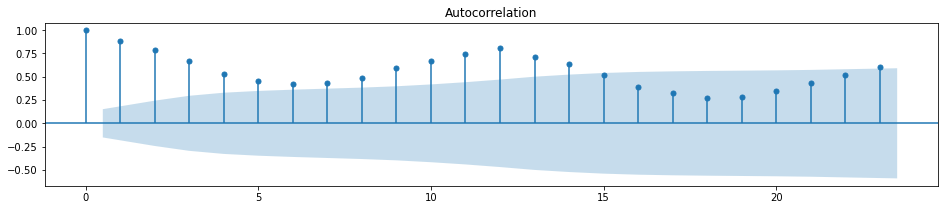

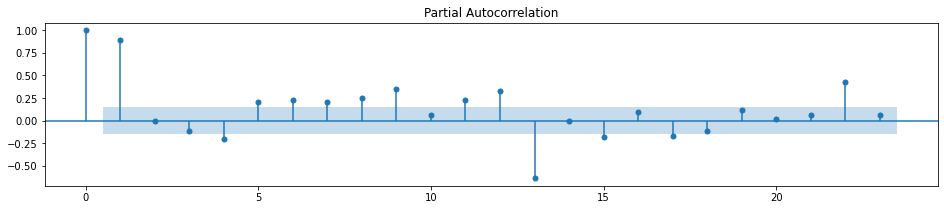

In [17]:
ts['United States'].plot()
ts_comp(ts['United States'])

* Differencing made the data stationary per the adfuller test but significant correlation can be observed at 12 periods (1 year). 

stationary


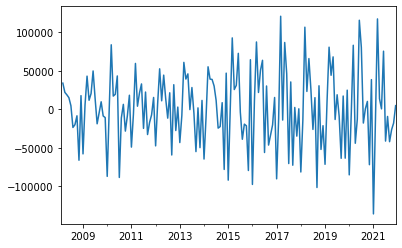

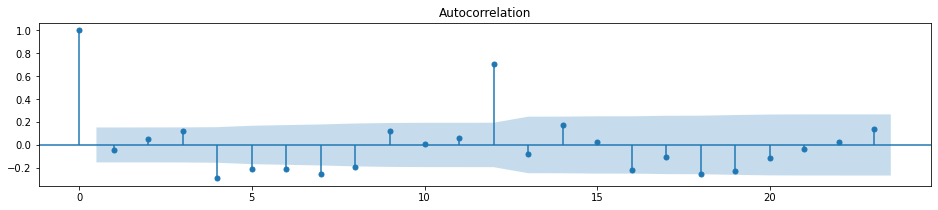

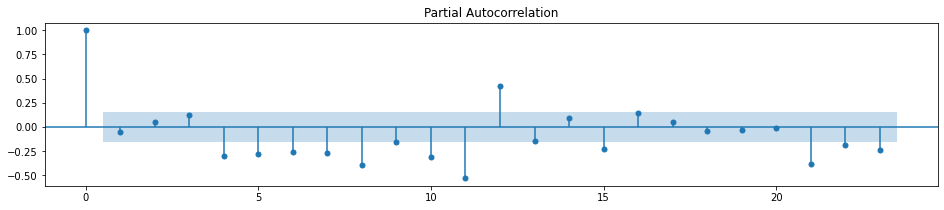

In [18]:
one_lag_diff_us = ts['United States'].diff()
one_lag_diff_us.plot()
ts_comp(one_lag_diff_us)

In [19]:
model_1 = print_arima_summary(one_lag_diff_us, (1,0,1))
model_1

                               SARIMAX Results                                
Dep. Variable:          United States   No. Observations:                  167
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -2011.894
Date:                Fri, 18 Feb 2022   AIC                           4031.788
Time:                        13:31:33   BIC                           4044.260
Sample:                    02-29-2008   HQIC                          4036.850
                         - 12-31-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1667.6408    249.778      6.676      0.000    1178.085    2157.197
ar.L1          0.7077      0.069     10.202      0.000       0.572       0.844
ma.L1         -0.9995      0.140     -7.126      0.0

3331.6700913935933


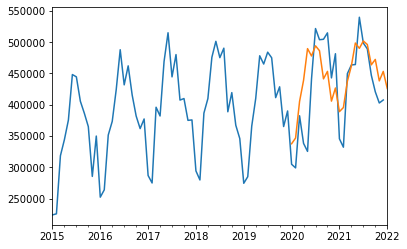

In [20]:
sarimax_test = SARIMAX(ts['United States'][:'2019'], order=(0,1,0), seasonal_order=(1,0,1,12)).fit()
sarimax_test.summary()

ts['United States']['2015':].plot()
sarimax_test.predict(start="2020", end="2022").plot()

print(sarimax_test.aic)

In [21]:
sarimax_err = pd.concat([ts['United States']['2020'], sarimax_test.predict(start="2020", end="2021")], axis=1)
sarimax_err['error'] = (sarimax_err['United States'] - sarimax_err['predicted_mean'])**2
rmse = sarimax_err['error'].mean()**0.5
rmse

67988.14832048773

#### Baseline Timeseries
* RMSE = 67,988
* AIC = 3,331

# Model optimization

#### Using gridsearch technique to find optimal parameters (seasonal order) based on AIC and RMSE
* seasonal order = (1, 1, 4, 12)
* RMSE = 55,832
* AIC = 3,001

* alternative order = (0, 1, 3, 12)  (not evaluated)


* Future analysis idea: Data was later scaled. Rerunning this gridsearch on scaled data could lead to a change in performance.

3020.4850567824406 0 1 0 67878.50595273146
3008.9852330872027 0 1 2 55770.452738953005
3001.6185679129503 0 1 3 59636.15442472415
3001.156987049006 1 1 4 55832.33677761753
2991.3108579775762 2 1 2 58409.383163480066
2987.271628212231 2 1 3 64870.25322157368
2984.5032040386877 3 1 2 65478.06331139837


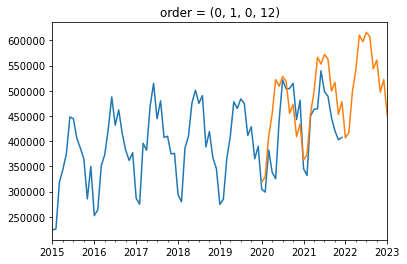

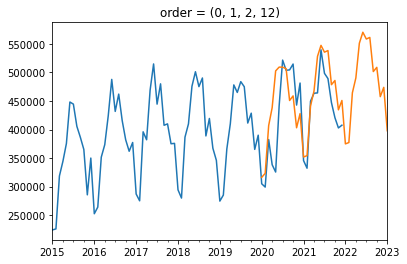

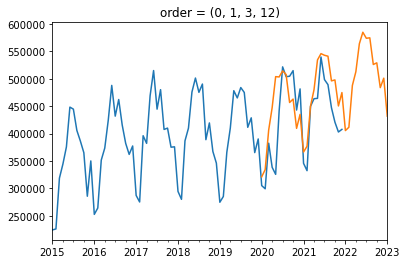

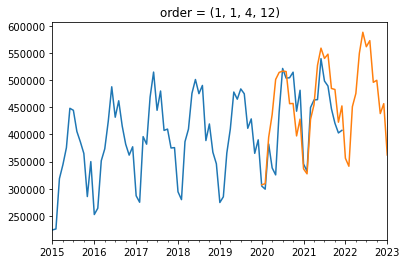

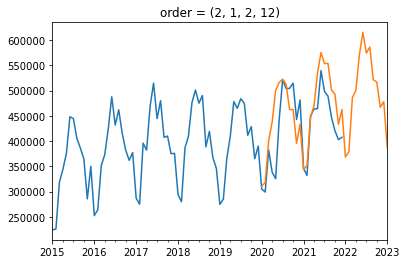

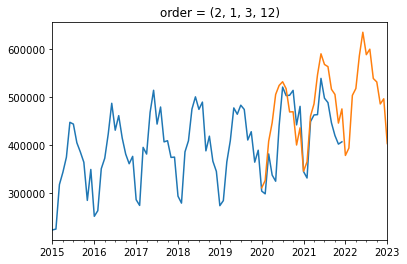

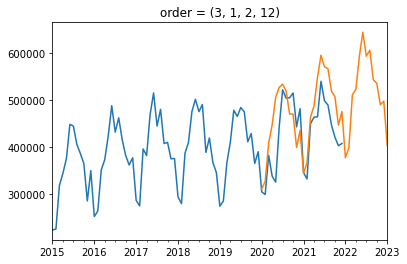

In [22]:
results = 1000000

for x in range(5):
    for y in range(1,2):
        for z in range(5):
            sample = SARIMAX(ts['United States'][:'2019'], order=(0,1,0), seasonal_order=(x,y,z,12)).fit()
#             sample.summary()
            aic = sample.aic
            
            temp_df = None
            temp_df = pd.concat([ts['United States']['2020':'2021'], sample.predict(start="2020", end="2022")], axis=1)
            temp_df['error'] = (temp_df['United States'] - temp_df['predicted_mean'])**2
            rmse = temp_df['error'].mean()**0.5
#             print(x, y, z, rmse)
            if aic < results:
                results = aic
                print(aic, x, y, z, rmse)
                plt.figure()
                ts['United States']['2015':].plot()
                ax = sample.predict(start="2020", end="2023").plot()
                ax.set_title(f'order = ({x}, {y}, {z}, 12)');
                

In [23]:
seasonal_ord = (1,1,4,12)

#### Testing Model on 10 Locations

* Note: RMSE for locations able to be compared between locations because its not calculated on the same scale. 

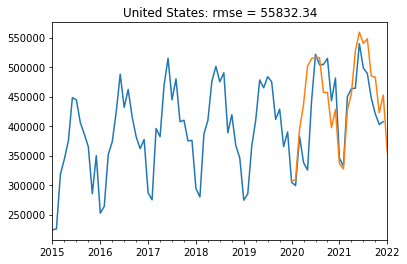

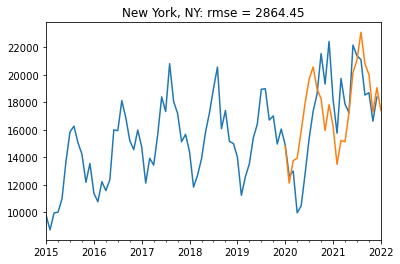

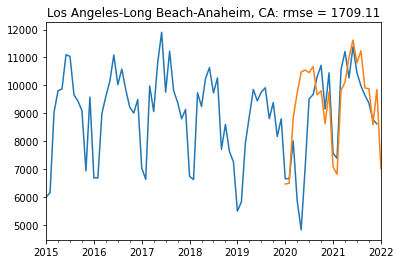

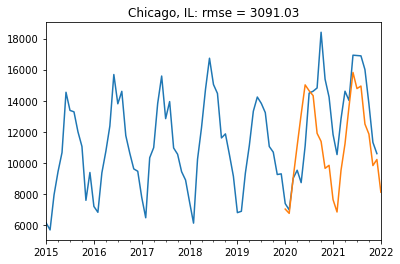

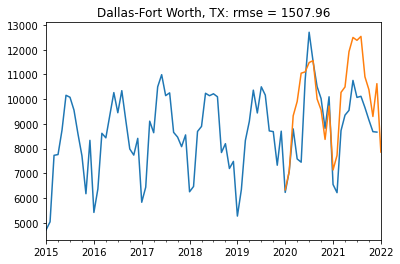

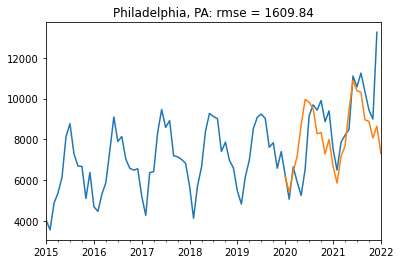

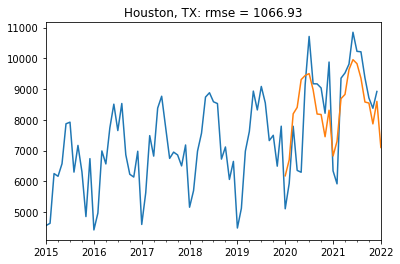

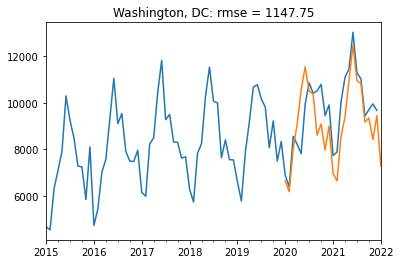

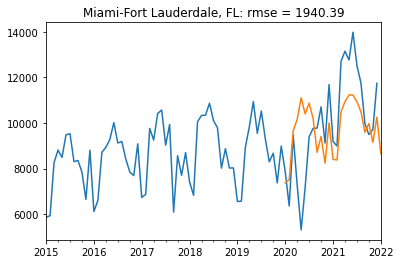

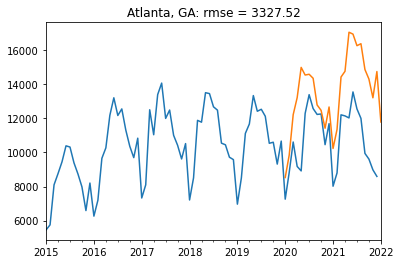

In [24]:
for x in ts.columns[:10]:
    optimized_sm = SARIMAX(ts[x][:'2019'], order=(0,1,0), seasonal_order=seasonal_ord).fit()
    
    temp_df = None
    temp_df = pd.concat([ts[x]['2020':'2021'], optimized_sm.predict(start="2020", end="2022")], axis=1)
    temp_df['error'] = (temp_df[x] - temp_df['predicted_mean'])**2
    rmse = temp_df['error'].mean()**0.5
            
    plt.figure()
    ts[x]['2015':].plot()
    ax = optimized_sm.predict(start="2020", end="2022").plot()
    ax.set_title(f'{x}: rmse = {str(round(rmse, 2))}');
    
    

In [25]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

* Creating Scaled Dataframes

In [26]:
ss = StandardScaler()
scaled_ts = ss.fit_transform(ts)
scaled_df = pd.DataFrame(scaled_ts)
scaled_df.set_index(ts.index, inplace=True)
scaled_df.columns = ts.columns
scaled_df

mm = MinMaxScaler()
mm_ts = mm.fit_transform(ts)
mm_df = pd.DataFrame(mm_ts)
mm_df.set_index(ts.index, inplace=True)
mm_df.columns = ts.columns
mm_df

RegionName  United States  New York, NY  Los Angeles-Long Beach-Anaheim, CA  \
2008-02-29       0.151802      0.177531                            0.042161   
2008-03-31       0.233090      0.217793                            0.129939   
2008-04-30       0.285793      0.259204                            0.223592   
2008-05-31       0.330861      0.275228                            0.280498   
2008-06-30       0.367043      0.303716                            0.295934   
...                   ...           ...                                 ...   
2021-08-31       0.879230      0.924186                            0.779058   
2021-09-30       0.778678      0.776635                            0.740007   
2021-10-31       0.715317      0.786170                            0.707868   
2021-11-30       0.672541      0.667624                            0.639558   
2021-12-31       0.684000      0.768193                            0.622163   

RegionName  Chicago, IL  Dallas-Fort Worth, TX  Philadelphia, PA  Houston, TX  \
2008-02-29     0.150941               0.198265          0.116229     0.207698   
2008-03-31     0.212798               0.309365          0.195701     0.337328   
2008-04-30     0.257905               0.389528          0.279825     0.371097   
2008-05-31     0.262045               0.415238          0.271078     0.408860   
2008-06-30     0.330678               0.434992          0.330728     0.465989   
...                 ...                    ...               ...          ...   
2021-08-31     0.904705               0.728992          0.813884     0.923021   
2021-09-30     0.849435               0.681438          0.730225     0.820746   
2021-10-31     0.710790               0.628658          0.646008     0.741225   
2021-11-30     0.555583               0.579431          0.604132     0.700799   
2021-12-31     0.510100               0.577446          1.000000     0.766885   

RegionName  Washington, DC  Miami-Fort Lauderdale, FL  Atlanta, GA  ...  \
2008-02-29        0.111314                   0.106532     0.207754  ...   
2008-03-31        0.185716                   0.142819     0.254935  ...   
2008-04-30        0.217822                   0.190574     0.301496  ...   
2008-05-31        0.257522                   0.186990     0.280251  ...   
2008-06-30        0.358839                   0.182959     0.324422  ...   
...                    ...                        ...          ...  ...   
2021-08-31        0.806690                   0.801003     0.816588  ...   
2021-09-30        0.652889                   0.640355     0.634682  ...   
2021-10-31        0.679900                   0.598154     0.605028  ...   
2021-11-30        0.703451                   0.617776     0.549172  ...   
2021-12-31        0.676055                   0.799570     0.514915  ...   

RegionName  Boise City, ID  Toledo, OH  Madison, WI  Lakeland, FL  Ogden, UT  \
2008-02-29        0.128079    0.116393     0.088025      0.137908   0.246968   
2008-03-31        0.197660    0.173770     0.200634      0.222147   0.336273   
2008-04-30        0.204433    0.214754     0.309278      0.213315   0.398015   
2008-05-31        0.240148    0.275410     0.411578      0.184783   0.454245   
2008-06-30        0.262931    0.295082     0.534496      0.223505   0.371555   
...                    ...         ...          ...           ...        ...   
2021-08-31        0.626847    0.744262     0.659794      0.788043   0.672547   
2021-09-30        0.708744    0.744262     0.567010      0.781929   0.672547   
2021-10-31        0.674877    0.744262     0.508723      0.697011   0.672547   
2021-11-30        0.610222    0.744262     0.450436      0.797894   0.672547   
2021-12-31        0.610222    0.744262     0.450436      0.898777   0.672547   

RegionName  Daytona Beach, FL  Des Moines, IA  Provo, UT  Durham, NC  \
2008-02-29           0.106922        0.176321   0.117512    0.186377   
2008-03-31           0.154755        0.210057   0.191244    0.311258   


In [27]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Scaling data tests

##### Creating a Dataframes for slope evaluation

Slope is used a single comparison metric for comparing regional trends.

Slope is determined by using a two year forecast. 

Percent error can be calculated on the known slope of the same two year window.

Model perform can be evaluated and benefits of scaling can be quantified for comparison.

* Future anlaysis: Only the 2 year window 2020-2021 was used to evaluate/compare the models. A global pandemic had a great impact on the real estate market during that time. It would be worth while to evaluate the model performance in the same way on an older window of time for example 2017-2018. 

* Time series modeling has decreasing accuracy with furture out predicitions. That is why a 2 year window was used for comparison. 2 years = 2 data points (1 data point = full 12 month seasonal pattern), and 2 points for drawning a linear trend. Model performance could also be tested at 1 or 3 years. The longer the predictions hold up the better because real estate investments tend to be long term investments.

In [28]:
# arr = []
# for x in scaled_df.columns:
    
#     #MinMaxScaled Data
#     mm_sarimax_for_lr_preds = SARIMAX(mm_df[x][:'2019'], order=(0,1,0), seasonal_order=seasonal_ord).fit()
#     preds = mm_sarimax_for_lr_preds.predict(start="2020", end="2022")
#     y = preds.values
#     m1, b = np.polyfit(range(len(y)), y, 1)
    
#     y = mm_df['2020':][x].values
#     m1a, b = np.polyfit(range(len(y)), y, 1)
    
#     #StandardScaled Data
#     ss_sarimax_for_lr_preds = SARIMAX(scaled_df[x][:'2019'], order=(0,1,0), seasonal_order=seasonal_ord).fit()
#     preds = ss_sarimax_for_lr_preds.predict(start="2020", end="2022")
#     y = preds.values
#     m2, b = np.polyfit(range(len(y)), y, 1)
    
#     y = scaled_df['2020':][x].values
#     m2a, b = np.polyfit(range(len(y)), y, 1)
    
#     #No Scaling
#     none_sarimax_for_lr_preds = SARIMAX(ts[x][:'2019'], order=(0,1,0), seasonal_order=seasonal_ord).fit()
#     preds = none_sarimax_for_lr_preds.predict(start="2020", end="2022")
#     y = preds.values
#     m3, b = np.polyfit(range(len(y)), y, 1)
    
#     y = ts['2020':][x].values
#     m3a, b = np.polyfit(range(len(y)), y, 1)
    
#     arr.append((x, m1, m1a, m2, m2a, m3, m3a))
    
# slope_df = pd.DataFrame(arr, columns=['Location', 
#                                       'MinMax_forcast', 'MinMax_actual', 
#                                       'Standard_forcast', 'Standard_actual', 
#                                       'No_Scaling_forcast', 'No_Scaling_actual'])

# slope_df.to_pickle("dataframes/slope_validation_df.pkl")

slope_df = pd.read_pickle("dataframes/slope_validation_df.pkl")

slope_df

Location  MinMax_forcast  MinMax_actual  \
0                        United States        0.006506       0.009440   
1                         New York, NY        0.012231       0.018294   
2   Los Angeles-Long Beach-Anaheim, CA        0.006500       0.016239   
3                          Chicago, IL        0.000263       0.014713   
4                Dallas-Fort Worth, TX        0.005116       0.004450   
..                                 ...             ...            ...   
84                   Daytona Beach, FL        0.006379       0.011487   
85                      Des Moines, IA        0.004633       0.004014   
86                           Provo, UT        0.004802       0.002916   
87                          Durham, NC        0.005033       0.003299   
88                    Fort Collins, CO        0.004318       0.008104   

    Standard_forcast  Standard_actual  No_Scaling_forcast  No_Scaling_actual  
0           0.026920         0.038782         2731.813466        3946.032609  
1           0.062235         0.077262          197.712358         318.520870  
2           0.029770         0.075769           42.519067         140.969130  
3           0.001362         0.064517           55.072065         234.531522  
4           0.024273         0.021089           71.309627          42.579130  
..               ...              ...                 ...                ...  
84          0.025750         0.045738           11.391924          20.411739  
85          0.020716         0.017283            7.548176           6.305217  
86          0.021521         0.013242            2.913511           2.531304  
87          0.020366         0.013342           10.847851           3.486522  
88          0.018875         0.035287            4.003019           7.472174  

[89 rows x 7 columns]

In [29]:
slope_df.describe()

MinMax_forcast  MinMax_actual  Standard_forcast  Standard_actual  \
count       89.000000      89.000000         89.000000        89.000000   
mean         0.006067       0.007957          0.026608         0.035038   
std          0.003154       0.007296          0.013307         0.033085   
min         -0.000129      -0.021005         -0.000528        -0.084692   
25%          0.003770       0.004235          0.017690         0.017283   
50%          0.005609       0.007908          0.025204         0.033391   
75%          0.008218       0.011564          0.033543         0.052386   
max          0.013652       0.025325          0.062235         0.124012   

       No_Scaling_forcast  No_Scaling_actual  
count           89.000000          89.000000  
mean            53.909798          77.406408  
std            288.530015         418.450199  
min             -0.119383         -19.450435  
25%              5.971576           7.793478  
50%             13.767698          15.136957  
75%             31.795500          36.880870  
max           2731.813466        3946.032609

Sorting Values based on the forcast you want to use. You can plug locations into the cell below to visualize the forcast for the past to years.

In [30]:
slope_df.sort_values('Standard_forcast')

Location  MinMax_forcast  MinMax_actual  Standard_forcast  \
70           Akron, OH       -0.000129       0.014950         -0.000528   
3          Chicago, IL        0.000263       0.014713          0.001362   
78      Fort Myers, FL        0.000156       0.015816          0.002882   
49  Salt Lake City, UT        0.001317       0.003006          0.005540   
39       Milwaukee, WI        0.001419       0.010306          0.006378   
..                 ...             ...            ...               ...   
50       Rochester, NY        0.007185       0.012148          0.051163   
69      Greensboro, NC        0.011545      -0.018214          0.053577   
48         Raleigh, NC        0.013652      -0.002134          0.054085   
74        Syracuse, NY        0.012361       0.011564          0.057029   
1         New York, NY        0.012231       0.018294          0.062235   

    Standard_actual  No_Scaling_forcast  No_Scaling_actual  
70         0.058967           -0.119383          14.098261  
3          0.064517           55.072065         234.531522  
78         0.089358            3.350087          58.265217  
49         0.013164            2.901189           4.945217  
39         0.046064            4.306453          19.436957  
..              ...                 ...                ...  
50         0.052386           13.767698          15.136957  
69        -0.077004            9.569677         -17.430435  
48        -0.008450           38.839724          -6.197826  
74         0.053178            9.703900           9.065942  
1          0.077262          197.712358         318.520870  

[89 rows x 7 columns]

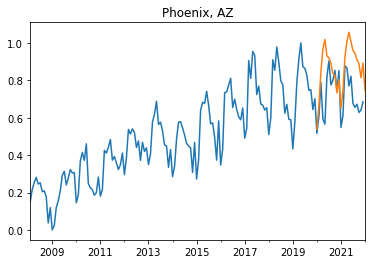

In [31]:
for x in ['Phoenix, AZ']:
    optimized_sm = SARIMAX(mm_df[x][:'2019'], order=(0,1,0), seasonal_order=seasonal_ord).fit()

    mm_df[x].plot()
    ax = optimized_sm.predict(start="2020", end="2022").plot()
    ax.set_title(x);


Error Calculations to compare the standarizing Methods

Mean of errors (Lower error = Better method)
* MinMax = .50
* Standard = .55
* None = .60

In [32]:
slope_df['mm_err'] = abs(slope_df['MinMax_forcast'] - slope_df['MinMax_actual'])/slope_df['MinMax_actual']
slope_df['ss_err'] = abs(slope_df['Standard_forcast'] - slope_df['Standard_actual'])/slope_df['Standard_actual']
slope_df['non_err'] = abs(slope_df['No_Scaling_forcast'] - slope_df['No_Scaling_actual'])/slope_df['No_Scaling_actual']

In [33]:
slope_df[['mm_err', 'ss_err', 'non_err']].describe()

mm_err     ss_err    non_err
count  89.000000  89.000000  89.000000
mean    0.502736   0.552513   0.605989
std     2.408192   2.586014   2.653876
min    -8.225078  -8.217126  -8.175543
25%     0.160468   0.194488   0.150992
50%     0.489285   0.526421   0.529329
75%     0.732245   0.766964   0.753625
max    12.099454  12.634426  12.967208

# Model comparisons

* MinMax Scaler has smallest mean error

In [34]:
# forcasts = []

# for x in scaled_df.columns: # Scaled_df.Columns is just a list of location names MinMax scaled df used for calcualations
    
#     #MinMaxScaled Data
#     mm_sarimax_for_lr_preds = SARIMAX(mm_df[x], order=(0,1,0), seasonal_order=seasonal_ord).fit()
#     preds = mm_sarimax_for_lr_preds.predict(start="2022", end="2024")
#     y = preds.values
#     slope, b = np.polyfit(range(len(y)), y, 1)
    
#     forcasts.append((x, slope))
                    
# forcast_df = pd.DataFrame(forcasts, columns=['Location', 'Forcast_slope_mm_scaled'])

# forcast_df.to_pickle("dataframes/mm_forcasts_df.pkl")

forcast_df = pd.read_pickle("dataframes/mm_forcasts_df.pkl")

forcast_df.sort_values('Forcast_slope_mm_scaled')

Location  Forcast_slope_mm_scaled
36  Virginia Beach, VA                -0.014782
76   Winston-Salem, NC                -0.013445
9          Atlanta, GA                -0.010921
73      Charleston, SC                -0.007398
37       Nashville, TN                -0.005094
..                 ...                      ...
41         Memphis, TN                 0.008401
47         Buffalo, NY                 0.011305
67          Dayton, OH                 0.011702
70           Akron, OH                 0.012558
5     Philadelphia, PA                 0.015836

[89 rows x 2 columns]

In [35]:
# forcasts = []

# for x in scaled_df.columns:
    
#     #StandardScaled Data
#     ss_sari = SARIMAX(scaled_df[x], order=(0,1,0), seasonal_order=seasonal_ord).fit()
#     preds = ss_sari.predict(start="2022", end="2024")
#     y = preds.values
#     slope, b = np.polyfit(range(len(y)), y, 1)
    
#     forcasts.append((x, slope))
                    
# ss_forcast_df = pd.DataFrame(forcasts, columns=['Location', 'Forcast_slope_ss_scaled'])

# ss_forcast_df.to_pickle("dataframes/ss_forcasts_df.pkl")

ss_forcast_df = pd.read_pickle("dataframes/ss_forcasts_df.pkl")

ss_forcast_df.sort_values('Forcast_slope_ss_scaled')

Location  Forcast_slope_ss_scaled
36  Virginia Beach, VA                -0.069525
76   Winston-Salem, NC                -0.054285
11   San Francisco, CA                -0.036766
9          Atlanta, GA                -0.036546
73      Charleston, SC                -0.028887
..                 ...                      ...
56       Worcester, MA                 0.035793
67          Dayton, OH                 0.045217
47         Buffalo, NY                 0.046852
70           Akron, OH                 0.050930
5     Philadelphia, PA                 0.084291

[89 rows x 2 columns]

In [36]:
# forcasts = []

# for x in scaled_df.columns:
    
#     # none saceled ts Data
#     ts_sari = SARIMAX(ts[x], order=(0,1,0), seasonal_order=seasonal_ord).fit()
#     preds = ts_sari.predict(start="2022", end="2024")
#     y = preds.values
#     slope, b = np.polyfit(range(len(y)), y, 1)
    
#     forcasts.append((x, slope))
                    
# ts_forcast_df = pd.DataFrame(forcasts, columns=['Location', 'Forcast_slope_ts'])

# ts_forcast_df.to_pickle("dataframes/ts_forcasts_df.pkl")

ts_forcast_df = pd.read_pickle("dataframes/ts_forcasts_df.pkl")

ts_forcast_df.sort_values('Forcast_slope_ts')

Location  Forcast_slope_ts
0                        United States       -846.945985
9                          Atlanta, GA        -85.379352
3                          Chicago, IL        -78.627943
36                  Virginia Beach, VA        -74.109956
2   Los Angeles-Long Beach-Anaheim, CA        -43.343333
..                                 ...               ...
10                          Boston, MA         25.193967
40                    Jacksonville, FL         25.228042
16             Minneapolis-St Paul, MN         26.280408
12                         Detroit, MI         33.644848
5                     Philadelphia, PA        181.976592

[89 rows x 2 columns]

# MinMax Prediction Visualizations

##### Positive Recommendations

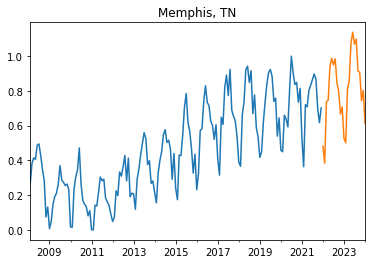

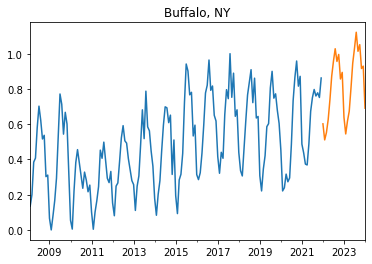

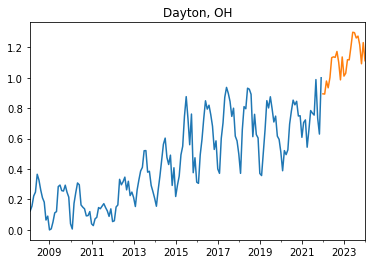

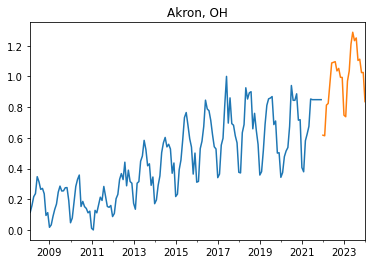

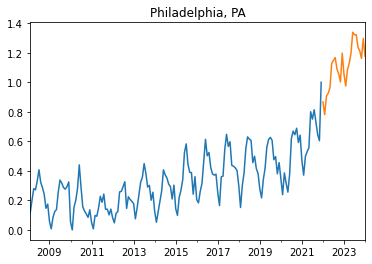

In [37]:
for x in forcast_df.sort_values('Forcast_slope_mm_scaled').tail().Location:
    optimized_sm = SARIMAX(mm_df[x], order=(0,1,0), seasonal_order=seasonal_ord).fit()
    
    plt.figure()
    mm_df[x].plot()
    ax = optimized_sm.predict(start="2022", end="2024").plot()
    ax.set_title(x);

##### Negative Recommendations

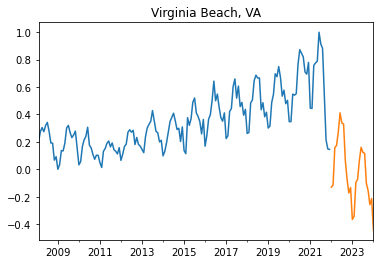

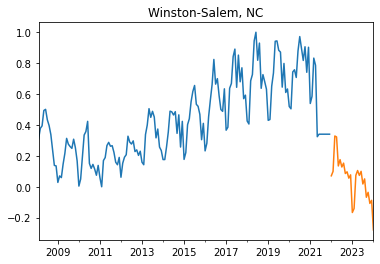

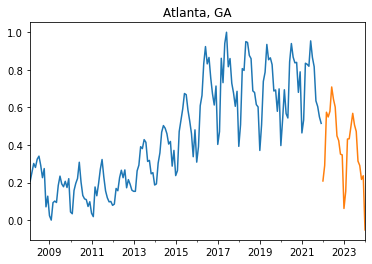

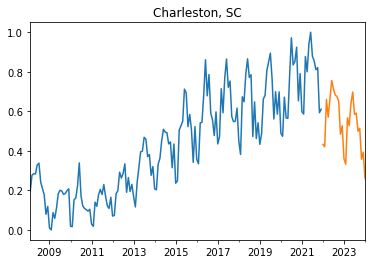

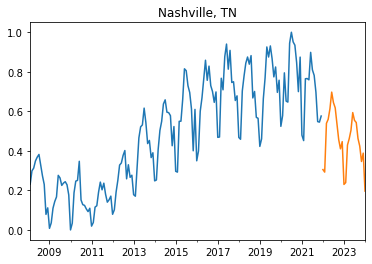

In [38]:
for x in forcast_df.sort_values('Forcast_slope_mm_scaled').head().Location:
    optimized_sm = SARIMAX(mm_df[x], order=(0,1,0), seasonal_order=seasonal_ord).fit()
    
    plt.figure()
    mm_df[x].plot()
    ax = optimized_sm.predict(start="2022", end="2024").plot()
    ax.set_title(x);

# Standard Scaler Prediction Visualizations

##### Positive Recommendations


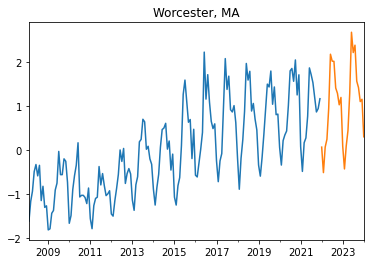

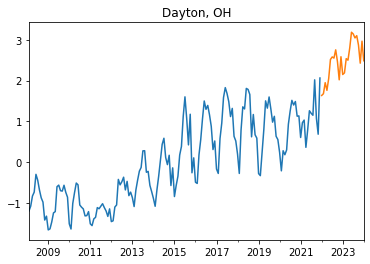

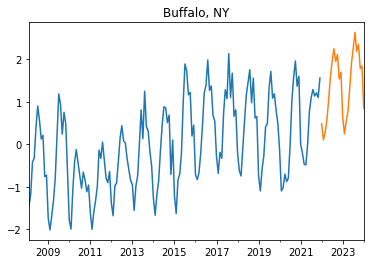

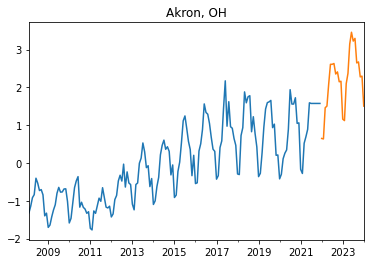

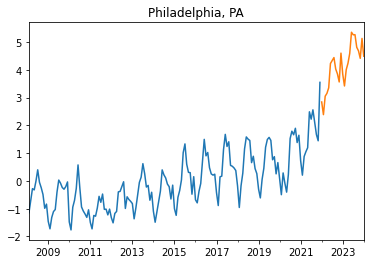

In [39]:
for x in ss_forcast_df.sort_values('Forcast_slope_ss_scaled').tail().Location:
    optimized_sm = SARIMAX(scaled_df[x], order=(0,1,0), seasonal_order=seasonal_ord).fit()
    
    plt.figure()
    scaled_df[x].plot()
    ax = optimized_sm.predict(start="2022", end="2024").plot()
    ax.set_title(x);

##### Negative Recommendations

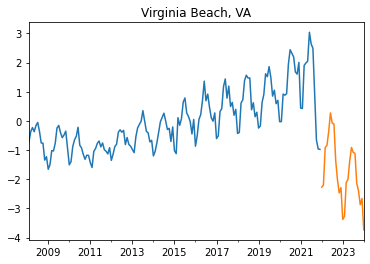

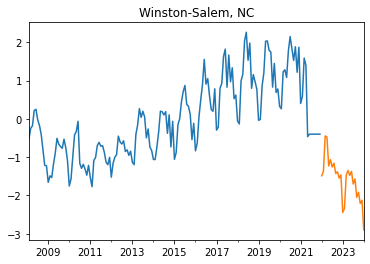

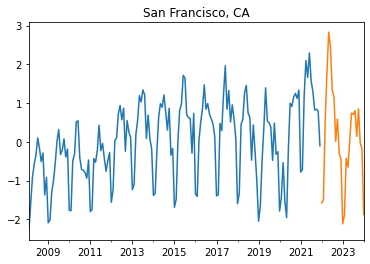

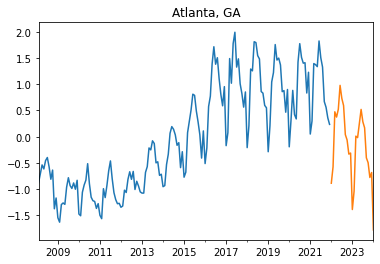

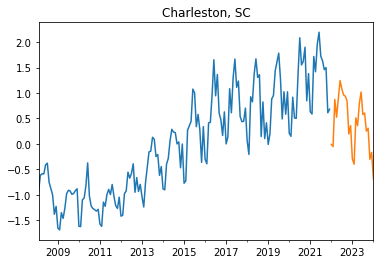

In [40]:
for x in ss_forcast_df.sort_values('Forcast_slope_ss_scaled').head().Location:
    optimized_sm = SARIMAX(scaled_df[x], order=(0,1,0), seasonal_order=seasonal_ord).fit()
    
    plt.figure()
    scaled_df[x].plot()
    ax = optimized_sm.predict(start="2022", end="2024").plot()
    ax.set_title(x);

# No Scaling Prediction Visualizations

##### Positive Recommendations

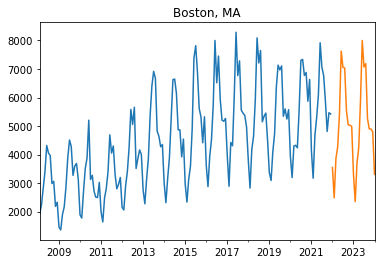

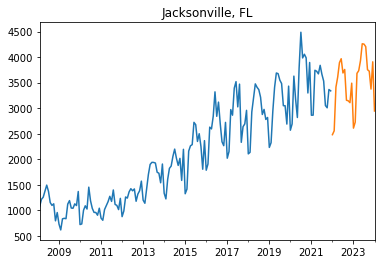

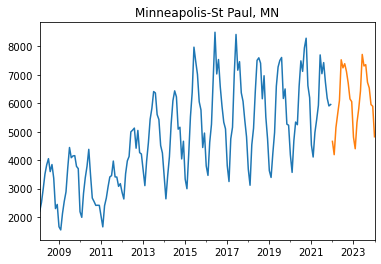

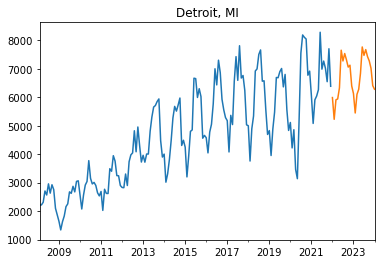

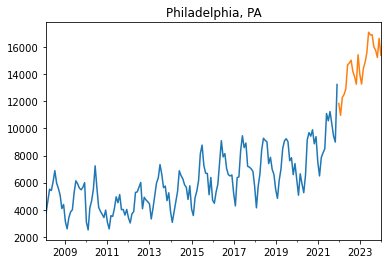

In [41]:
for x in ts_forcast_df.sort_values('Forcast_slope_ts').tail().Location:
    optimized_sm = SARIMAX(ts[x], order=(0,1,0), seasonal_order=seasonal_ord).fit()
    
    plt.figure()
    ts[x].plot()
    ax = optimized_sm.predict(start="2022", end="2024").plot()
    ax.set_title(x);

##### Negative Recommendations

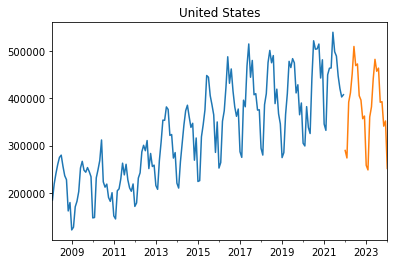

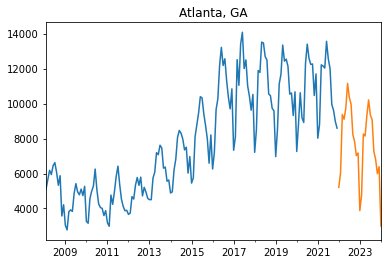

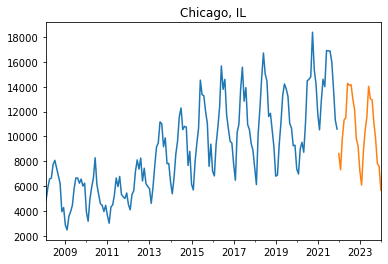

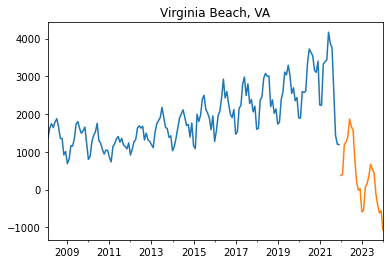

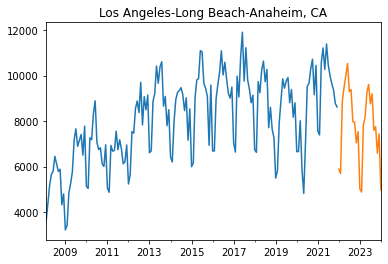

In [42]:
for x in ts_forcast_df.sort_values('Forcast_slope_ts').head().Location:
    optimized_sm = SARIMAX(ts[x], order=(0,1,0), seasonal_order=seasonal_ord).fit()
    
    plt.figure()
    ts[x].plot()
    ax = optimized_sm.predict(start="2022", end="2024").plot()
    ax.set_title(x);

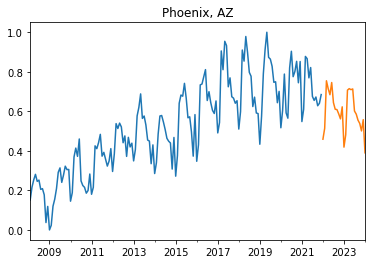

In [43]:
for x in ['Phoenix, AZ']:
    optimized_sm = SARIMAX(mm_df[x], order=(0,1,0), seasonal_order=seasonal_ord).fit()

    mm_df[x].plot()
    ax = optimized_sm.predict(start="2022", end="2024").plot()
    ax.set_title(x);


Summary:
* Model performance is poor when there is outlier data.
* Model sensitivity could potentially be tuned. 
* Pricing data could be incorperated to quantify profitablity. (supply and demand tend to determine pricing)